In [1]:
import scipy
import numpy
import matplotlib
import pandas
import sklearn

In [2]:
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [54]:
# Load dataset
# url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
# names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
# dataset = read_csv(url, names=names)
dataset=read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')

In [55]:
dataset.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

In [56]:
# shape
print(dataset.shape)

(101547, 60)


In [57]:
# head
print(dataset.head(20))

   iso_code continent     location        date  total_cases  new_cases  \
0       AFG      Asia  Afghanistan  2020-02-24          1.0        1.0   
1       AFG      Asia  Afghanistan  2020-02-25          1.0        0.0   
2       AFG      Asia  Afghanistan  2020-02-26          1.0        0.0   
3       AFG      Asia  Afghanistan  2020-02-27          1.0        0.0   
4       AFG      Asia  Afghanistan  2020-02-28          1.0        0.0   
5       AFG      Asia  Afghanistan  2020-02-29          1.0        0.0   
6       AFG      Asia  Afghanistan  2020-03-01          1.0        0.0   
7       AFG      Asia  Afghanistan  2020-03-02          1.0        0.0   
8       AFG      Asia  Afghanistan  2020-03-03          2.0        1.0   
9       AFG      Asia  Afghanistan  2020-03-04          4.0        2.0   
10      AFG      Asia  Afghanistan  2020-03-05          4.0        0.0   
11      AFG      Asia  Afghanistan  2020-03-06          4.0        0.0   
12      AFG      Asia  Afghanistan  20

In [58]:
# descriptions
print(dataset.describe())

        total_cases      new_cases  new_cases_smoothed  total_deaths  \
count  9.779000e+04   97787.000000        96777.000000  8.759500e+04   
mean   1.098055e+06    6047.154806         6066.990903  2.951140e+04   
std    7.500627e+06   37711.617898        37437.084443  1.761454e+05   
min    1.000000e+00  -74347.000000        -6223.000000  1.000000e+00   
25%    1.322000e+03       2.000000            7.571000  5.500000e+01   
50%    1.394950e+04      74.000000           92.857000  4.130000e+02   
75%    1.492405e+05     818.000000          860.143000  3.951000e+03   
max    1.864600e+08  906017.000000       826388.429000  4.024998e+06   

         new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  87751.000000         96777.000000             97270.000000   
mean     146.053458           131.700145             13542.278828   
std      798.882238           743.058376             24716.121529   
min    -1918.000000          -232.143000                 0.001000   
25%   

In [59]:
# class distribution
print(dataset.groupby('iso_code').size())

iso_code
ABW    104
AFG    503
AGO    478
AIA    149
ALB    502
      ... 
WSM    235
YEM    457
ZAF    520
ZMB    480
ZWE    478
Length: 231, dtype: int64


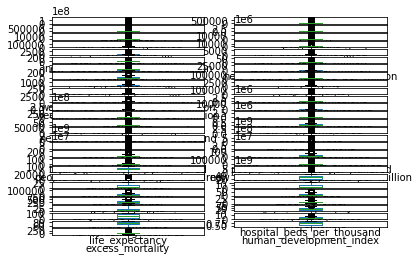

In [33]:
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(28,2), sharex=False, sharey=False)
pyplot.show()

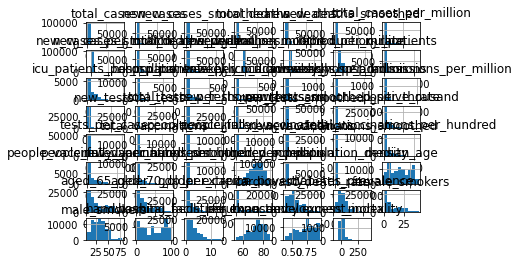

In [34]:
# histograms
dataset.hist()
pyplot.show()

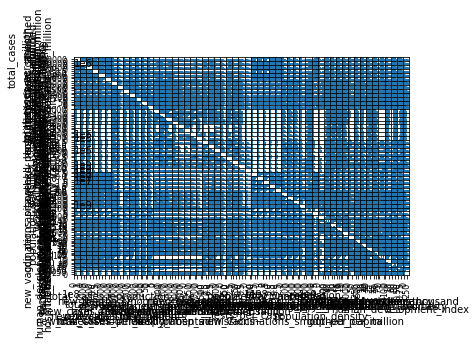

In [35]:
# scatter plot matrix
scatter_matrix(dataset)
pyplot.show()

# 5. Evaluate Some Algorithms

Now it is time to create some models of the data and estimate their accuracy on unseen data.

Here is what we are going to cover in this step:

Separate out a validation dataset.
Set-up the test harness to use 10-fold cross validation.
Build multiple different models to predict species from flower measurements
Select the best model.

## 5.1 Create a Validation Dataset

We need to know that the model we created is good.

Later, we will use statistical methods to estimate the accuracy of the models that we create on unseen data. We also want a more concrete estimate of the accuracy of the best model on unseen data by evaluating it on actual unseen data.

That is, we are going to hold back some data that the algorithms will not get to see and we will use this data to get a second and independent idea of how accurate the best model might actually be.

We will split the loaded dataset into two, 80% of which we will use to train, evaluate and select among our models, and 20% that we will hold back as a validation dataset.

In [61]:
dataset.isnull().any().any()

True

In [66]:
dataset.fillna(dataset.mean(), inplace=True)

In [68]:
dataset.dropna()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
1017,ALB,Europe,Albania,2020-02-25,1.098055e+06,6047.154806,6066.990903,29511.396655,146.053458,131.700145,...,1.1,304.195,10.08,7.1,51.2,50.822148,2.89,78.57,0.795,18.251563
1018,ALB,Europe,Albania,2020-02-26,1.098055e+06,6047.154806,6066.990903,29511.396655,146.053458,131.700145,...,1.1,304.195,10.08,7.1,51.2,50.822148,2.89,78.57,0.795,18.251563
1019,ALB,Europe,Albania,2020-02-27,1.098055e+06,6047.154806,6066.990903,29511.396655,146.053458,131.700145,...,1.1,304.195,10.08,7.1,51.2,50.822148,2.89,78.57,0.795,18.251563
1020,ALB,Europe,Albania,2020-02-28,1.098055e+06,6047.154806,6066.990903,29511.396655,146.053458,131.700145,...,1.1,304.195,10.08,7.1,51.2,50.822148,2.89,78.57,0.795,18.251563
1021,ALB,Europe,Albania,2020-02-29,1.098055e+06,6047.154806,6066.990903,29511.396655,146.053458,131.700145,...,1.1,304.195,10.08,7.1,51.2,50.822148,2.89,78.57,0.795,2.170000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101540,ZWE,Africa,Zimbabwe,2021-07-04,5.447400e+04,809.000000,1147.429000,1878.000000,19.000000,20.286000,...,21.4,307.846,1.82,1.6,30.7,36.791000,1.70,61.49,0.571,18.251563
101541,ZWE,Africa,Zimbabwe,2021-07-05,5.601400e+04,1540.000000,1247.143000,1911.000000,33.000000,23.143000,...,21.4,307.846,1.82,1.6,30.7,36.791000,1.70,61.49,0.571,18.251563
101542,ZWE,Africa,Zimbabwe,2021-07-06,5.796300e+04,1949.000000,1347.143000,1939.000000,28.000000,25.429000,...,21.4,307.846,1.82,1.6,30.7,36.791000,1.70,61.49,0.571,18.251563
101543,ZWE,Africa,Zimbabwe,2021-07-07,6.022700e+04,2264.000000,1480.429000,1973.000000,34.000000,26.286000,...,21.4,307.846,1.82,1.6,30.7,36.791000,1.70,61.49,0.571,18.251563


In [69]:
dataset.isnull().any()

iso_code                                 False
continent                                 True
location                                 False
date                                     False
total_cases                              False
new_cases                                False
new_cases_smoothed                       False
total_deaths                             False
new_deaths                               False
new_deaths_smoothed                      False
total_cases_per_million                  False
new_cases_per_million                    False
new_cases_smoothed_per_million           False
total_deaths_per_million                 False
new_deaths_per_million                   False
new_deaths_smoothed_per_million          False
reproduction_rate                        False
icu_patients                             False
icu_patients_per_million                 False
hosp_patients                            False
hosp_patients_per_million                False
weekly_icu_ad

In [70]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:4]
y = array[:,4]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

You now have training data in the X_train and Y_train for preparing models and a X_validation and Y_validation sets that we can use later.

Notice that we used a python slice to select the columns in the NumPy array. If this is new to you, you might want to check-out this post:

[How to Index, Slice and Reshape NumPy Arrays for Machine Learning in Python](https://machinelearningmastery.com/index-slice-reshape-numpy-arrays-machine-learning-python/) 

## 5.2 Test Harness

We will use stratified 10-fold cross validation to estimate model accuracy.

This will split our dataset into 10 parts, train on 9 and test on 1 and repeat for all combinations of train-test splits.

Stratified means that each fold or split of the dataset will aim to have the same distribution of example by class as exist in the whole training dataset.

For more on the k-fold cross-validation technique, see the tutorial:

[A Gentle Introduction to k-fold Cross-Validation](https://machinelearningmastery.com/k-fold-cross-validation/) 

We set the random seed via the random_state argument to a fixed number to ensure that each algorithm is evaluated on the same splits of the training dataset.

The specific random seed does not matter, learn more about pseudorandom number generators here:

[Introduction to Random Number Generators for Machine Learning in Python](https://machinelearningmastery.com/introduction-to-random-number-generators-for-machine-learning/) 

We are using the metric of ‘accuracy‘ to evaluate models.

This is a ratio of the number of correctly predicted instances divided by the total number of instances in the dataset multiplied by 100 to give a percentage (e.g. 95% accurate). We will be using the scoring variable when we run build and evaluate each model next.

## 5.3 Build Models

We don’t know which algorithms would be good on this problem or what configurations to use.

We get an idea from the plots that some of the classes are partially linearly separable in some dimensions, so we are expecting generally good results.

Let’s test 6 different algorithms:

Logistic Regression (LR)
Linear Discriminant Analysis (LDA)
K-Nearest Neighbors (KNN).
Classification and Regression Trees (CART).
Gaussian Naive Bayes (NB).
Support Vector Machines (SVM).
This is a good mixture of simple linear (LR and LDA), nonlinear (KNN, CART, NB and SVM) algorithms.

Let’s build and evaluate our models:

In [71]:
np.isnan(dataset.any()) #and gets False

iso_code                                 False
continent                                False
location                                 False
date                                     False
total_cases                              False
new_cases                                False
new_cases_smoothed                       False
total_deaths                             False
new_deaths                               False
new_deaths_smoothed                      False
total_cases_per_million                  False
new_cases_per_million                    False
new_cases_smoothed_per_million           False
total_deaths_per_million                 False
new_deaths_per_million                   False
new_deaths_smoothed_per_million          False
reproduction_rate                        False
icu_patients                             False
icu_patients_per_million                 False
hosp_patients                            False
hosp_patients_per_million                False
weekly_icu_ad

In [72]:
np.isfinite(dataset.all())

iso_code                                 True
continent                                True
location                                 True
date                                     True
total_cases                              True
new_cases                                True
new_cases_smoothed                       True
total_deaths                             True
new_deaths                               True
new_deaths_smoothed                      True
total_cases_per_million                  True
new_cases_per_million                    True
new_cases_smoothed_per_million           True
total_deaths_per_million                 True
new_deaths_per_million                   True
new_deaths_smoothed_per_million          True
reproduction_rate                        True
icu_patients                             True
icu_patients_per_million                 True
hosp_patients                            True
hosp_patients_per_million                True
weekly_icu_admissions             

In [73]:
dataset.dropna()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
1017,ALB,Europe,Albania,2020-02-25,1.098055e+06,6047.154806,6066.990903,29511.396655,146.053458,131.700145,...,1.1,304.195,10.08,7.1,51.2,50.822148,2.89,78.57,0.795,18.251563
1018,ALB,Europe,Albania,2020-02-26,1.098055e+06,6047.154806,6066.990903,29511.396655,146.053458,131.700145,...,1.1,304.195,10.08,7.1,51.2,50.822148,2.89,78.57,0.795,18.251563
1019,ALB,Europe,Albania,2020-02-27,1.098055e+06,6047.154806,6066.990903,29511.396655,146.053458,131.700145,...,1.1,304.195,10.08,7.1,51.2,50.822148,2.89,78.57,0.795,18.251563
1020,ALB,Europe,Albania,2020-02-28,1.098055e+06,6047.154806,6066.990903,29511.396655,146.053458,131.700145,...,1.1,304.195,10.08,7.1,51.2,50.822148,2.89,78.57,0.795,18.251563
1021,ALB,Europe,Albania,2020-02-29,1.098055e+06,6047.154806,6066.990903,29511.396655,146.053458,131.700145,...,1.1,304.195,10.08,7.1,51.2,50.822148,2.89,78.57,0.795,2.170000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101540,ZWE,Africa,Zimbabwe,2021-07-04,5.447400e+04,809.000000,1147.429000,1878.000000,19.000000,20.286000,...,21.4,307.846,1.82,1.6,30.7,36.791000,1.70,61.49,0.571,18.251563
101541,ZWE,Africa,Zimbabwe,2021-07-05,5.601400e+04,1540.000000,1247.143000,1911.000000,33.000000,23.143000,...,21.4,307.846,1.82,1.6,30.7,36.791000,1.70,61.49,0.571,18.251563
101542,ZWE,Africa,Zimbabwe,2021-07-06,5.796300e+04,1949.000000,1347.143000,1939.000000,28.000000,25.429000,...,21.4,307.846,1.82,1.6,30.7,36.791000,1.70,61.49,0.571,18.251563
101543,ZWE,Africa,Zimbabwe,2021-07-07,6.022700e+04,2264.000000,1480.429000,1973.000000,34.000000,26.286000,...,21.4,307.846,1.82,1.6,30.7,36.791000,1.70,61.49,0.571,18.251563


In [75]:
X_train = X_train.apply(lambda col:pd.to_numeric(col, errors='coerce'))

AttributeError: 'numpy.ndarray' object has no attribute 'apply'

In [74]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

ValueError: Supported target types are: ('binary', 'multiclass'). Got 'unknown' instead.

## 5.4 Select Best Model

We now have 6 models and accuracy estimations for each. We need to compare the models to each other and select the most accurate.

Running the example above, we get the following raw results:

Note: Your results may vary given the stochastic nature of the algorithm or evaluation procedure, or differences in numerical precision. Consider running the example a few times and compare the average outcome.

What scores did you get?
Post your results in the comments below.

In this case, we can see that it looks like Support Vector Machines (SVM) has the largest estimated accuracy score at about 0.98 or 98%.

We can also create a plot of the model evaluation results and compare the spread and the mean accuracy of each model. There is a population of accuracy measures for each algorithm because each algorithm was evaluated 10 times (via 10 fold-cross validation).

A useful way to compare the samples of results for each algorithm is to create a box and whisker plot for each distribution and compare the distributions.

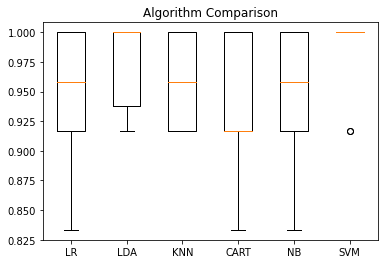

In [15]:
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

# 6. Make Predictions

We must choose an algorithm to use to make predictions.

The results in the previous section suggest that the SVM was perhaps the most accurate model. We will use this model as our final model.

Now we want to get an idea of the accuracy of the model on our validation set.

This will give us an independent final check on the accuracy of the best model. It is valuable to keep a validation set just in case you made a slip during training, such as overfitting to the training set or a data leak. Both of these issues will result in an overly optimistic result.

## 6.1 Make Predictions

We can fit the model on the entire training dataset and make predictions on the validation dataset.

In [16]:
# Make predictions on validation dataset
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

You might also like to make predictions for single rows of data. For examples on how to do that, see the tutorial:

[How to Make Predictions with scikit-learn](https://machinelearningmastery.com/make-predictions-scikit-learn/)
You might also like to save the model to file and load it later to make predictions on new data. For examples on how to do this, see the tutorial:

[Save and Load Machine Learning Models in Python with scikit-learn](https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/)

## 6.2 Evaluate Predictions

We can evaluate the predictions by comparing them to the expected results in the validation set, then calculate classification accuracy, as well as a confusion matrix and a classification report.

In [17]:
# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



We can see that the accuracy is 0.966 or about 96% on the hold out dataset.

The confusion matrix provides an indication of the errors made.

Finally, the classification report provides a breakdown of each class by precision, recall, f1-score and support showing excellent results (granted the validation dataset was small).

# 7-Plot different SVM classifiers in the iris dataset¶

Comparison of different linear SVM classifiers on a 2D projection of the iris dataset. We only consider the first 2 features of this dataset:

Sepal length
Sepal width
This example shows how to plot the decision surface for four SVM classifiers with different kernels.

The linear models LinearSVC() and SVC(kernel='linear') yield slightly different decision boundaries. This can be a consequence of the following differences:

LinearSVC minimizes the squared hinge loss while SVC minimizes the regular hinge loss.
LinearSVC uses the One-vs-All (also known as One-vs-Rest) multiclass reduction while SVC uses the One-vs-One multiclass reduction.
Both linear models have linear decision boundaries (intersecting hyperplanes) while the non-linear kernel models (polynomial or Gaussian RBF) have more flexible non-linear decision boundaries with shapes that depend on the kind of kernel and its parameters.

Note while plotting the decision function of classifiers for toy 2D datasets can help get an intuitive understanding of their respective expressive power, be aware that those intuitions don’t always generalize to more realistic high-dimensional problems.
../../_images/sphx_glr_plot_iris_001.png

Automatically created module for IPython interactive environment


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


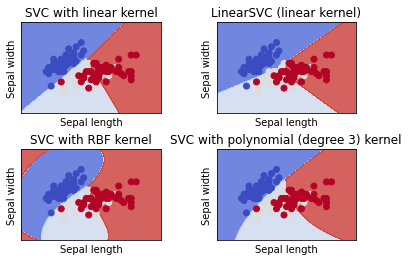

In [18]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = iris.target

h = .02  # step size in the mesh

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(X, y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)
lin_svc = svm.LinearSVC(C=C).fit(X, y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']


for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

# Lesson 6: Prepare For Modeling by Pre-Processing Data

Your raw data may not be setup to be in the best shape for modeling.

Sometimes you need to preprocess your data in order to best present the inherent structure of the problem in your data to the modeling algorithms. In today’s lesson, you will use the pre-processing capabilities provided by the scikit-learn.

The scikit-learn library provides two standard idioms for transforming data. Each transform is useful in different circumstances: Fit and Multiple Transform and Combined Fit-And-Transform.

There are many techniques that you can use to prepare your data for modeling. For example, try out some of the following

Standardize numerical data (e.g. mean of 0 and standard deviation of 1) using the scale and center options.
Normalize numerical data (e.g. to a range of 0-1) using the range option.
Explore more advanced feature engineering such as Binarizing.
For example, the snippet below loads the Pima Indians onset of diabetes dataset, calculates the parameters needed to standardize the data, then creates a standardized copy of the input data.

In [76]:
from sklearn.preprocessing import StandardScaler
import pandas
import numpy
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pandas.read_csv(url, names=names)
array = dataframe.values
# separate array into input and output components
X = array[:,0:8]
Y = array[:,8]
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)
# summarize transformed data
numpy.set_printoptions(precision=3)
print(rescaledX[0:5,:])

[[ 0.64   0.848  0.15   0.907 -0.693  0.204  0.468  1.426]
 [-0.845 -1.123 -0.161  0.531 -0.693 -0.684 -0.365 -0.191]
 [ 1.234  1.944 -0.264 -1.288 -0.693 -1.103  0.604 -0.106]
 [-0.845 -0.998 -0.161  0.155  0.123 -0.494 -0.921 -1.042]
 [-1.142  0.504 -1.505  0.907  0.766  1.41   5.485 -0.02 ]]


## Lesson 7: Algorithm Evaluation With Resampling Methods

The dataset used to train a machine learning algorithm is called a training dataset. The dataset used to train an algorithm cannot be used to give you reliable estimates of the accuracy of the model on new data. This is a big problem because the whole idea of creating the model is to make predictions on new data.

You can use statistical methods called resampling methods to split your training dataset up into subsets, some are used to train the model and others are held back and used to estimate the accuracy of the model on unseen data.

Your goal with today’s lesson is to practice using the different resampling methods available in scikit-learn, for example:

Split a dataset into training and test sets.
Estimate the accuracy of an algorithm using k-fold cross validation.
Estimate the accuracy of an algorithm using leave one out cross validation.
The snippet below uses scikit-learn to estimate the accuracy of the Logistic Regression algorithm on the Pima Indians onset of diabetes dataset using 10-fold cross validation.

In [78]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
kfold = KFold(n_splits=10, random_state=None)
model = LogisticRegression(solver='liblinear')
results = cross_val_score(model, X, Y, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 76.951% (4.841%)


## Lesson 8: Algorithm Evaluation Metrics

There are many different metrics that you can use to evaluate the skill of a machine learning algorithm on a dataset.

You can specify the metric used for your test harness in scikit-learn via the cross_validation.cross_val_score() function and defaults can be used for regression and classification problems. Your goal with today’s lesson is to practice using the different algorithm performance metrics available in the scikit-learn package.

Practice using the Accuracy and LogLoss metrics on a classification problem.
Practice generating a confusion matrix and a classification report.
Practice using RMSE and RSquared metrics on a regression problem.
The snippet below demonstrates calculating the LogLoss metric on the Pima Indians onset of diabetes dataset.

In [82]:
# Cross Validation Classification LogLoss
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
kfold = KFold(n_splits=10, random_state=None)
model = LogisticRegression(solver='liblinear')
scoring = 'neg_log_loss'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("Logloss: %.3f (%.3f)",results.mean(), results.std())

Logloss: %.3f (%.3f) -0.4925579697374668 0.047024773138816076


## Lesson 9: Spot-Check Algorithms

You cannot possibly know which algorithm will perform best on your data beforehand.

You have to discover it using a process of trial and error. I call this spot-checking algorithms. The scikit-learn library provides an interface to many machine learning algorithms and tools to compare the estimated accuracy of those algorithms.

In this lesson, you must practice spot checking different machine learning algorithms.

Spot check linear algorithms on a dataset (e.g. linear regression, logistic regression and linear discriminate analysis).
Spot check some non-linear algorithms on a dataset (e.g. KNN, SVM and CART).
Spot-check some sophisticated ensemble algorithms on a dataset (e.g. random forest and stochastic gradient boosting).
For example, the snippet below spot-checks the K-Nearest Neighbors algorithm on the Boston House Price dataset.

In [84]:
# KNN Regression
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.data"
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dataframe = read_csv(url, delim_whitespace=True, names=names)
array = dataframe.values
X = array[:,0:13]
Y = array[:,13]
kfold = KFold(n_splits=10, random_state=None)
model = KNeighborsRegressor()
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print(results.mean())

-107.28683898039215


# Lesson 10: Model Comparison and Selection


Now that you know how to spot check machine learning algorithms on your dataset, you need to know how to compare the estimated performance of different algorithms and select the best model.

In today’s lesson, you will practice comparing the accuracy of machine learning algorithms in Python with scikit-learn.

Compare linear algorithms to each other on a dataset.
Compare nonlinear algorithms to each other on a dataset.
Compare different configurations of the same algorithm to each other.
Create plots of the results comparing algorithms.
The example below compares Logistic Regression and Linear Discriminant Analysis to each other on the Pima Indians onset of diabetes dataset.

In [86]:
# Compare Algorithms
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
# prepare models
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = KFold(n_splits=10, random_state=None)
	cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.769515 (0.048411)
LDA: 0.773462 (0.051592)


# Lesson 11: Improve Accuracy with Algorithm Tuning


Once you have found one or two algorithms that perform well on your dataset, you may want to improve the performance of those models.

One way to increase the performance of an algorithm is to tune its parameters to your specific dataset.

The scikit-learn library provides two ways to search for combinations of parameters for a machine learning algorithm. Your goal in today’s lesson is to practice each.

Tune the parameters of an algorithm using a grid search that you specify.
Tune the parameters of an algorithm using a random search.
The snippet below uses is an example of using a grid search for the Ridge Regression algorithm on the Pima Indians onset of diabetes dataset.

In [87]:
from pandas import read_csv
import numpy
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
alphas = numpy.array([1,0.1,0.01,0.001,0.0001,0])
param_grid = dict(alpha=alphas)
model = Ridge()
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid.fit(X, Y)
print(grid.best_score_)
print(grid.best_estimator_.alpha)

0.27961755931297233
1.0


# Lesson 12: Improve Accuracy with Ensemble Predictions


Another way that you can improve the performance of your models is to combine the predictions from multiple models.

Some models provide this capability built-in such as random forest for bagging and stochastic gradient boosting for boosting. Another type of ensembling called voting can be used to combine the predictions from multiple different models together.

In today’s lesson, you will practice using ensemble methods.

Practice bagging ensembles with the random forest and extra trees algorithms.
Practice boosting ensembles with the gradient boosting machine and AdaBoost algorithms.
Practice voting ensembles using by combining the predictions from multiple models together.
The snippet below demonstrates how you can use the Random Forest algorithm (a bagged ensemble of decision trees) on the Pima Indians onset of diabetes dataset.

In [89]:
# Random Forest Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
num_trees = 100
max_features = 3
kfold = KFold(n_splits=10, random_state=None)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7577580314422419


## Lesson 13: Finalize And Save Your Model


Once you have found a well-performing model on your machine learning problem, you need to finalize it.

In today’s lesson, you will practice the tasks related to finalizing your model.

Practice making predictions with your model on new data (data unseen during training and testing).
Practice saving trained models to file and loading them up again.

For example, the snippet below shows how you can create a Logistic Regression model, save it to file, then load it later and make predictions on unseen data.

In [91]:
# Save Model Using Pickle
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pickle
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
# Fit the model on 67%
model = LogisticRegression(solver='liblinear')
model.fit(X_train, Y_train)
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)

0.7559055118110236


# Lesson 14: Hello World End-to-End Project
You now know how to complete each task of a predictive modeling machine learning problem.

In today’s lesson, you need to practice putting the pieces together and working through a standard machine learning dataset end-to-end.

Work through the iris dataset end-to-end (the hello world of machine learning)

This includes the steps:

Understanding your data using descriptive statistics and visualization.
Preprocessing the data to best expose the structure of the problem.
Spot-checking a number of algorithms using your own test harness.
Improving results using algorithm parameter tuning.
Improving results using ensemble methods.
Finalize the model ready for future use.
Take it slowly and record your results along the way.

What model did you use? What results did you get? Let me know in the comments.

The End!
(Look How Far You Have Come)
You made it. Well done!

Take a moment and look back at how far you have come.

You started off with an interest in machine learning and a strong desire to be able to practice and apply machine learning using Python.
You downloaded, installed and started Python, perhaps for the first time and started to get familiar with the syntax of the language.
Slowly and steadily over the course of a number of lessons you learned how the standard tasks of a predictive modeling machine learning project map onto the Python platform.
Building upon the recipes for common machine learning tasks you worked through your first machine learning problems end-to-end using Python.
Using a standard template, the recipes and experience you have gathered you are now capable of working through new and different predictive modeling machine learning problems on your own.
Don’t make light of this, you have come a long way in a short amount of time.

This is just the beginning of your machine learning journey with Python. Keep practicing and developing your skills.